In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
df = pd.read_csv("data/c2.csv", parse_dates=['Datetime'])
df.set_index('Datetime', inplace=True)
df = df[['Power_Consumption_diff']]
df = df.dropna()
df.head()

,Power_Consumption_diff
Datetime,
1988-02-01,-1.8332
1988-03-01,-8.2218
1988-04-01,-4.9788
1988-05-01,-2.1563
1988-06-01,2.7753


In [31]:
train_size = int(len(df) * 0.8)

train = df.iloc[:train_size]
test = df.iloc[train_size:]

print(train.shape, test.shape, end='\n')

(316, 1) (80, 1)


In [32]:
ar14_model = ARIMA(train['Power_Consumption_diff'], order=(14, 0, 0))
ar14_fit = ar14_model.fit()

print(ar14_fit.summary())

                                 SARIMAX Results                                  
Dep. Variable:     Power_Consumption_diff   No. Observations:                  316
Model:                    ARIMA(14, 0, 0)   Log Likelihood                -729.487
Date:                    Thu, 29 Jan 2026   AIC                           1490.973
Time:                            15:24:03   BIC                           1551.065
Sample:                        02-01-1988   HQIC                          1514.979
                             - 05-01-2014                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1323      0.036      3.702      0.000       0.062       0.202
ar.L1         -0.3719      0.052     -7.124      0.000      -0.474      -0.270
ar.L2         -0.538

In [33]:
residuals = ar14_fit.resid

ljung_box = acorr_ljungbox(residuals, lags=[1], return_df=False)

print(ljung_box)

    lb_stat  lb_pvalue
1  0.393302   0.530569


In [34]:
forecast = ar14_fit.forecast(steps=len(test))

y_true = test['Power_Consumption_diff'].values
y_pred = forecast.values

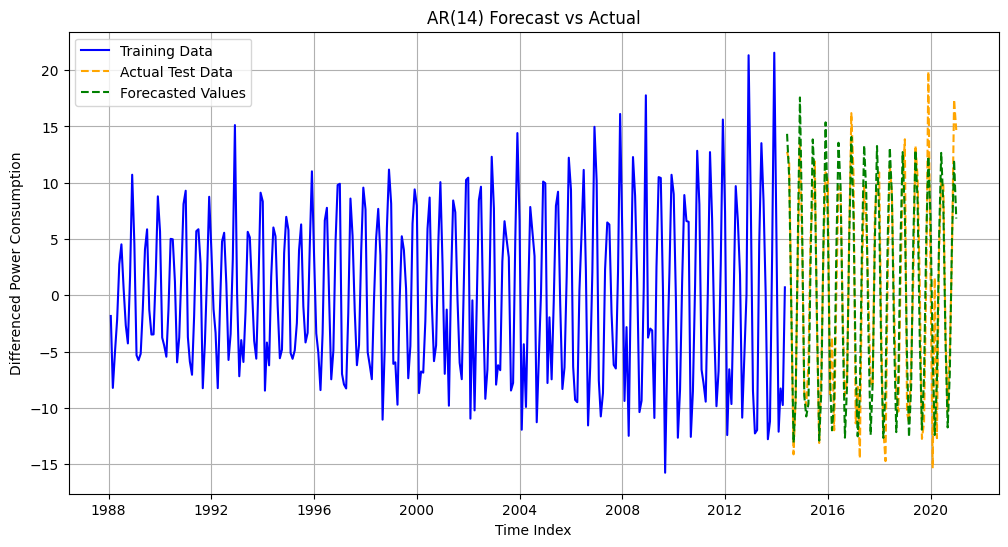

In [35]:
plt.figure(figsize=(12, 6))

plt.plot(train.index, train['Power_Consumption_diff'],
         label='Training data', color='blue')

plt.plot(test.index, y_true,
         label='Actual Test data', linestyle='--', color='orange')

plt.plot(test.index, y_pred,
         label='Forecasted Values', linestyle='--', color='green')

plt.title('AR(14) Forecast vs Actual')
plt.xlabel('Time Index')
plt.ylabel('Differenced Power Consumption')
plt.legend()
plt.grid(True)
plt.show()
